In [1]:
import os
import time
import numpy as np
import cv2
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
import itertools

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
import shutil

# Define the path to the working directory
working_directory_path = '/kaggle/working'

# List all files and directories in the working directory
files_and_dirs = os.listdir(working_directory_path)

# Delete all files and directories in the working directory
for item in files_and_dirs:
    item_path = os.path.join(working_directory_path, item)
    if os.path.isfile(item_path):
        os.remove(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

# Verify that the working directory is empty
if not os.listdir(working_directory_path):
    print("Working directory is now empty.")
else:
    print("Failed to clear the working directory.")

Working directory is now empty.


In [3]:
import cv2
import os

# Define the source directory, working directory, and output directory
source_dir = "/kaggle/input/plant-leaf-disease-plus-final-data-sajib"
working_dir = "/kaggle/working/dataset_enhanced"

# Function to apply CLAHE to an image
def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced_img


# Create the working directory if it doesn't exist
os.makedirs(working_dir, exist_ok=True)

# Loop through the source directory and enhance images
for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    working_class_dir = os.path.join(working_dir, class_name)
    os.makedirs(working_class_dir, exist_ok=True)
    
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        img = cv2.imread(image_path)
        enhanced_img = apply_clahe(img)
        
        working_image_path = os.path.join(working_class_dir, image_name)
        cv2.imwrite(working_image_path, enhanced_img)

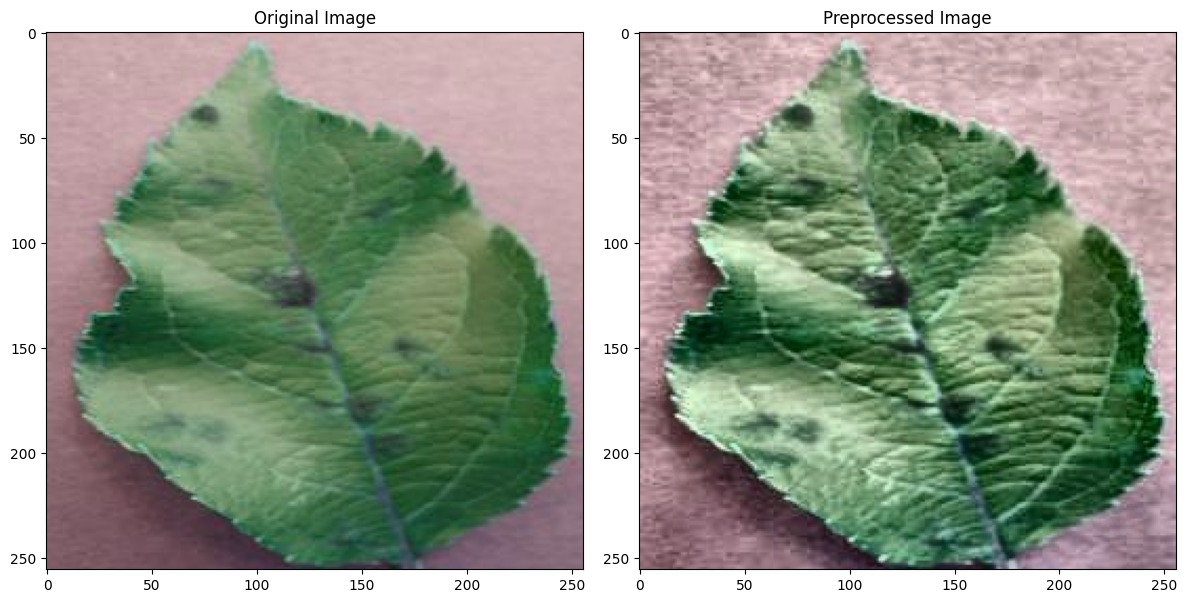

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a function to display images
def display_images(original, preprocessed, title1, title2):
    plt.figure(figsize=(12, 6))
    
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title1)
    
    # Display the preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed, cmap='gray')
    plt.title(title2)
    
    plt.tight_layout()
 
    # Save the displayed images as a PNG file
    plt.savefig('singleEnhanceImage.png', format='png')
    plt.show()
    plt.close()
  

# Example: Load and display the same image in its original and preprocessed forms
image_name = '00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'  # Replace with the actual image name
original_dir = '/kaggle/input/plant-leaf-disease-plus-final-data-sajib/Apple Scab/'
preprocessed_dir = '/kaggle/working/dataset_enhanced/Apple Scab/'  # Path to preprocessed images

original_image_path = os.path.join(original_dir, image_name)
preprocessed_image_path = os.path.join(preprocessed_dir, image_name)

# Check if the image files exist
if not os.path.isfile(original_image_path):
    print(f"Original image file '{image_name}' not found.")
elif not os.path.isfile(preprocessed_image_path):
    print(f"Preprocessed image file '{image_name}' not found.")
else:
    # Load the images
    original_image = cv2.imread(original_image_path)  # Load as grayscale
    preprocessed_image = cv2.imread(preprocessed_image_path)

    # Check if the images were loaded successfully
    if original_image is None:
        print(f"Failed to load the original image: '{image_name}'")
    elif preprocessed_image is None:
        print(f"Failed to load the preprocessed image: '{image_name}'")
    else:
        # Ensure the correct data type (np.uint8)
        original_image = np.array(original_image, dtype=np.uint8)
        preprocessed_image = np.array(preprocessed_image, dtype=np.uint8)

        # Display the images
        display_images(original_image, preprocessed_image, "Original Image", "Preprocessed Image")


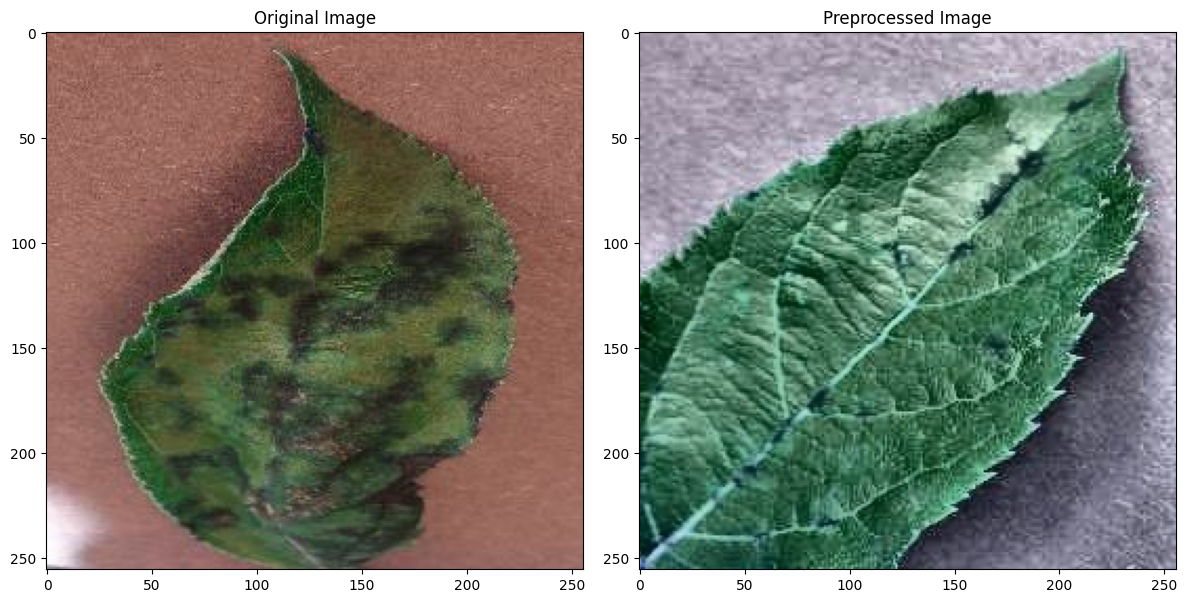

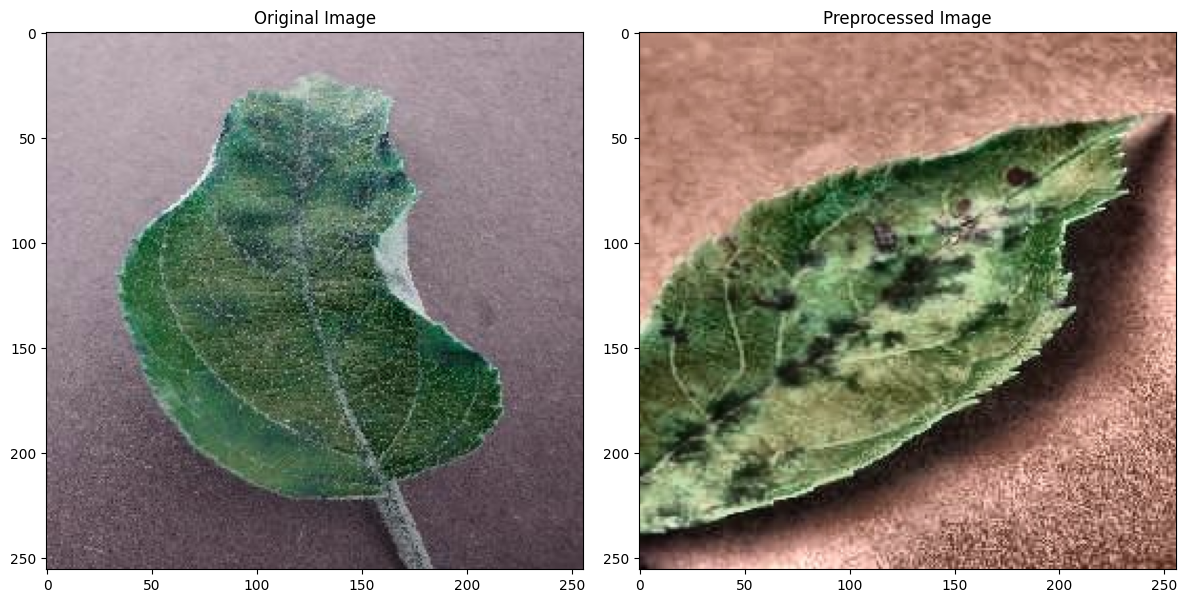

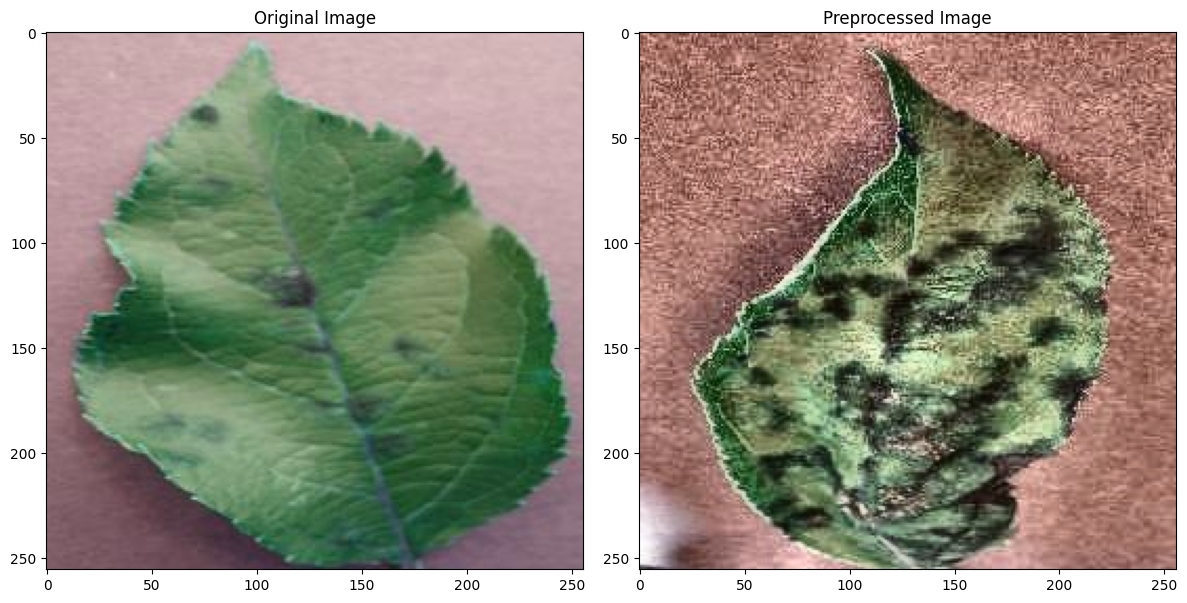

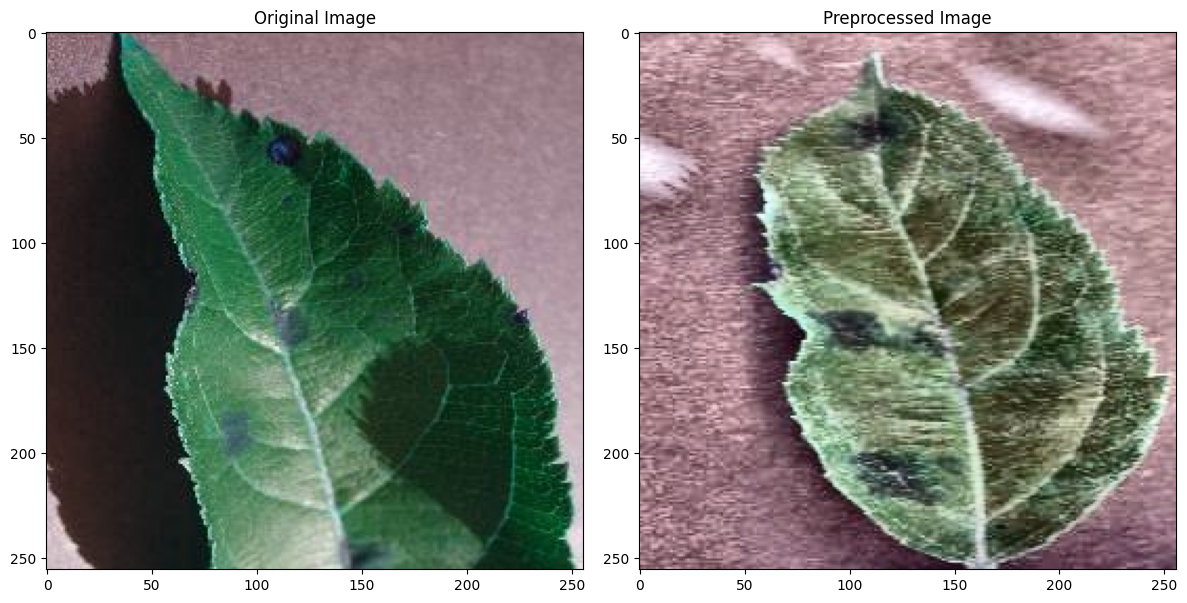

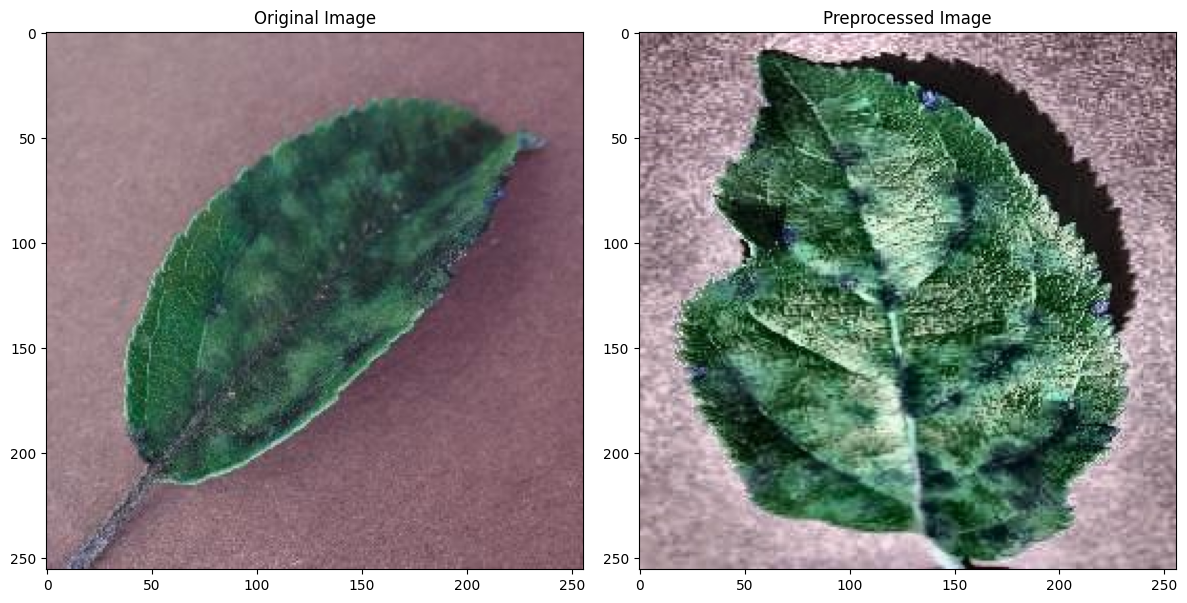

In [5]:
import cv2
import os
import random
import matplotlib.pyplot as plt

# Define a function to display and save images
def display_and_save_images(original, preprocessed, title1, title2, save_path):
    plt.figure(figsize=(12, 6))
    
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title1)
    
    # Display preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed, cmap='gray')
    plt.title(title2)
    
    plt.tight_layout()
    plt.savefig(save_path)  # Save the displayed images
    plt.show()

# Set the path to the directories containing the original and preprocessed images
original_dir = '/kaggle/input/plant-leaf-disease-plus-final-data-sajib/Apple Scab'
preprocessed_dir = '/kaggle/working/dataset_enhanced/Apple Scab/'  # Path to preprocessed images
# Choose 5 random image filenames from the original and preprocessed directories
random_original_images = random.sample(os.listdir(original_dir), 5)
random_preprocessed_images = random.sample(os.listdir(preprocessed_dir), 5)

# Display and save the randomly selected images
for i in range(5):
    original_image_path = os.path.join(original_dir, random_original_images[i])
    preprocessed_image_path = os.path.join(preprocessed_dir, random_preprocessed_images[i])

    original_image = cv2.imread(original_image_path)
    preprocessed_image = cv2.imread(preprocessed_image_path)

    save_path = f'RandomEnhancedImage_{i}.png'
    display_and_save_images(original_image, preprocessed_image, "Original Image", "Preprocessed Image", save_path)



In [6]:
data_dir_path = '/kaggle/working/dataset_split/'

In [7]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [8]:
import splitfolders

In [9]:
# Split the data into training, validation, and test sets using split_folders
splitfolders.ratio(working_dir, data_dir_path, seed=42, ratio=(0.8, 0.10, 0.10), group_prefix=None)

Copying files: 58495 files [00:10, 5523.25 files/s]


In [10]:
BATCH_SIZE = 32
IMAGE_SIZE = 256 #make it 256
CHANNEL = 3
EPOCHS = 1#10
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
target_size = (IMAGE_SIZE , IMAGE_SIZE)

In [11]:
# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator( rescale=1./255, horizontal_flip=True)
valid_datagen = ImageDataGenerator( rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator( rescale=1./255, horizontal_flip=True)

In [12]:
# Load the images
train_generator = train_datagen.flow_from_directory(directory=data_dir_path +'train', 
                                                    target_size=target_size,
                                                   
                                                   
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=1234)

valid_generator = valid_datagen.flow_from_directory(directory=data_dir_path +'val', 
                                                    target_size=target_size,
                                                   
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=1234)


test_generator = test_datagen.flow_from_directory(directory=data_dir_path +'test',
                                                  target_size=target_size,
                            
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=1234)

Found 46777 images belonging to 49 classes.
Found 5832 images belonging to 49 classes.
Found 5886 images belonging to 49 classes.


In [13]:
len(train_generator)

1462

In [17]:
classes= train_generator.class_indices
class_names = list(classes.keys())
class_names

['Apple  Cedar Rust',
 'Apple Blackrot',
 'Apple Scab',
 'Apple healthy',
 'Bean Angular LeafSpot',
 'Bean Healthy',
 'Bean Rust',
 'Bell Paper Bacterial Spot',
 'Bell Paper Healthy',
 'Blueberry healthy',
 'Cherry Powdery mildew',
 'Cherry healthy',
 'Corn Cercospora LeafSpot',
 'Corn Common Rust',
 'Corn Healthy',
 'Corn Leaf Blight',
 'Grape Blackrot',
 'Grape Esca',
 'Grape Healthy',
 'Grape Leaf Blight',
 'Mango Anthracnose',
 'Mango Bacterial Canker',
 'Mango Cutting Weevil',
 'Mango Die Back',
 'Mango Gall Midge',
 'Mango Healthy',
 'Mango Powdery Mildew',
 'Mango Sooty Mould',
 'Orange Citrus Greening',
 'Peach Bacterial Spot',
 'Peach Healthy',
 'Potato Early Blight',
 'Potato Healthy',
 'Potato Late Blight',
 'Raspberry Healthy',
 'Soybean Healthy',
 'Squash Powdery Mildew',
 'Strawberry Healthy',
 'Strawberry Leaf Scorch',
 'Tomato Bacterial Spot',
 'Tomato Early Blight',
 'Tomato Healthy',
 'Tomato Late Blight',
 'Tomato Leaf_Mold',
 'Tomato Mosaic Virus',
 'Tomato Septoria

In [54]:
# Load the ResNet-50 model with pre-trained weights (excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

In [55]:
# Create a new model on top of the ResNet-50 base (you can customize the top layers)
model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(49, activation='softmax')  # Change num_classes to your desired number
])

In [56]:
# Compile the model
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

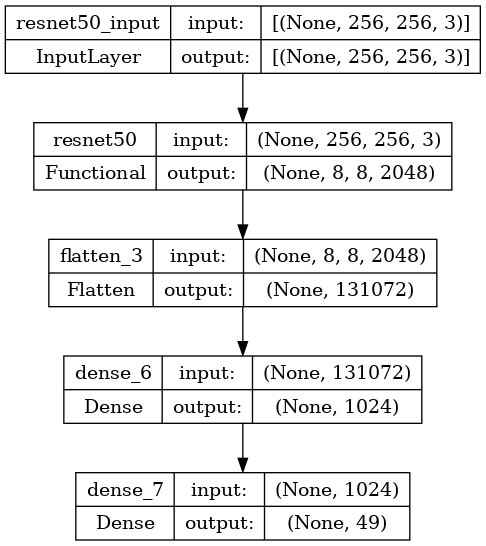

In [57]:
keras.utils.plot_model(model, show_shapes=True)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [59]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model_mcp = ModelCheckpoint(filepath = "/kaggle/working/model_weights.h5", monitor = 'val_accuracy', 
                      save_best_only = True, verbose = 1)

In [61]:
import time

# Record the start time
start_time = time.time()

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,epochs=EPOCHS,
                     callbacks=[model_es, model_rlr, model_mcp])

 496/1461 [=========>....................] - ETA: 6:37 - loss: 0.4777 - accuracy: 0.8795

In [ ]:
# Record the end time
end_time = time.time()

# Calculate and display the training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

In [ ]:
# Extract the final training and validation accuracy and convert to percentage
final_training_accuracy = history.history['accuracy'][-1] * 100
final_validation_accuracy = history.history['val_accuracy'][-1] * 100

print("Final Training Accuracy:", final_training_accuracy, "%")
print("Final Validation Accuracy:", final_validation_accuracy, "%")


In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os

# Load the saved model
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/kaggle/working/model_weights.h5")

# Use the test data generator to generate predictions for the test set
test_predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true labels from the test data generator
true_labels = test_generator.classes

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap
plt.figure(figsize=(30, 35))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Classification Matrix.png', format='png')
plt.show()

# Print the classification report
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print(classification_rep)

# Save the classification report to a text file
with open("/kaggle/working/classification_report.txt", "w") as text_file:
    text_file.write(classification_rep)


In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc , label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc , label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss , label='Training Loss')
plt.plot(range(EPOCHS),val_loss , label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('TrainingTestingAccuracyLoss.png', format='png')
plt.show()

In [ ]:
model.save("/kaggle/working/model/pbmodel")
model.save("/kaggle/working/model/model.h5")
model.save_weights("/kaggle/working/model/weights.h5")